### <div align="center"><b><h3>Spam Email Detector - Personal Project</h3></b></div>

### Introduction

In this project, I am challenging myself to learn the basics of machine learning by addressing a real-world inconvenience.

<b>The Problem:</b> Spam - we all receive it and understand how annoying it can be. What if I could develop a script that labels emails as spam when certain patterns are detected?

<b>Solution:</b> Utilizing a database of emails labeled as spam or not spam, I will train a machine learning model to accurately classify emails that the model has never encountered before. In the end, I will create a simple graphical user interface (GUI) that allows users without coding knowledge to easily benefit from the application.

Below, I outline each step I took to create it:

### 1. Data Loading & Initial Analysis

Firstly, I needed to find a database of pre-categorized emails. Fortunately, this was straightforward, thanks to the availability of free databases on the web.
I used [this one](https://github.com/MWiechmann/enron_spam_data), kindly uploaded by M. Wiechmann, who slightly modified the original resource created by V. Metsis, I. Androutsopoulos, and G. Paliouras.

This dataset consists of over 30,000 hand-labeled emails, approximately half of which are classified as spam. It is commonly used for educational purposes.

Spam emails are labeled as <i>Spam</i>, while non-spam emails are labeled as <i>Ham</i>.

##### 1.1 Loading the dataset

I first import the <i>pandas</i> library, as it offers efficient data manipulation and analysis tools that simplify the process of handling data later.

To make using it more convenient, I assign it the alias <i>pd</i>.

In [19]:
import pandas as pd

Now, I define a variable called <i>data</i> to which I load the dataset using the <i>read_csv()</i> function from the <i>pandas</i> library.

In [20]:
data = pd.read_csv('enron_spam_data.csv')  # Load the dataset

##### 1.2 Initial Analysis

Let's visualize this dataset to better understand its structure. To achieve this, I am using the <i>matplotlib</i> library and its simple yet powerful commands.

As shown below, the distribution of ham and spam emails is relatively balanced, with a slightly greater number labeled as spam.

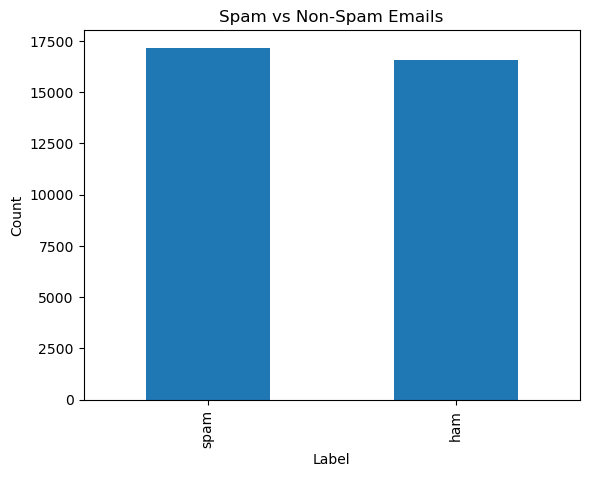

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of spam vs. non-spam emails
data['Spam/Ham'].value_counts().plot(kind='bar')
plt.title('Spam vs Non-Spam Emails')  # Set the plot title
plt.xlabel('Label')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()  # Display the plot

Due to the extensive nature of this database, the authenticity of each email, and the approximately equal distribution of spam and non-spam messages, this dataset serves as an excellent resource for this project.

### 2. Data Preparation

In its current state, the data is not ready to be used as a training set for a machine learning model. It contains unnecessary columns and is not in a format that the model can understand. Let’s prepare the data step by step.

##### 2.1 Dropping redundant and empty values

The CSV file I’m using, alongside the email's subject and contents, also provides information about the date it was received and the message ID. I find both of these values redundant in the training process, as they do not contribute any value to the model, which is why I will remove them from the dataset.

Similarly, any empty or missing values will not be helpful, so I will drop them as well.

Using the capabilities of previously imported <i>pandas</i> library, this process can be accomplished with just two simple commands.

In [ ]:
data = data.drop(columns=['Message ID', 'Date'])  # Remove unnecessary columns
data = data.dropna()  # Drop rows with missing values

##### 2.2 Tokenizing the values, removing punctuation and stopwords

Now, let’s focus on the subject and the email's contents.

Punctuation does not benefit the model, so we will remove all of it. Additionally, we will convert all words to lowercase to eliminate case sensitivity.

We can take this a step further. Throughout the emails, there will be many commonly used words that appear in both spam and ham messages, known as <i>stopwords</i>. Examples of stopwords include "the," "a," and "is." During this step, I will ensure that these words are excluded from the dataset.

The workflow will be straightforward. First, we will dissect both the subject and the message into individual words (a process called <i>tokenization</i>). Then, we will verify that each word is indeed a valid word (alphanumeric), strip it of any punctuation, and check that it is not a stopword.

This process is heavily facilitated by the <i>nltk</i> library, which allows me to quickly download and use a list of stopwords in a variety of languages. Let's start by importing it and the needed submodules for later.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

When using the library for the first time, you would download the list of stopwords using the following command:

In [ ]:
# nltk.download('stopwords')

However, since these stopwords are already included in the project's files, there is no need to download them again. Instead, I will specify the data's path to ensure that the program knows where to find it.

In [ ]:
nltk.data.path.append('nltk_data')  # Set NLTK data path (containing stopwords)

Now, I will define a function called <i>preprocess_text()</i> which will handle the data preprocessing steps described above.

In [ ]:
def preprocess_text(text):
    text = text.lower().strip()  # Lowercase and strip whitespace
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))  # Set of stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Filter tokens
    return ' '.join(tokens)  # Return cleaned text

Now that the function is defined, let's apply it to both the subject and the email's contents.

This task can be accomplished easily using the <i>.apply()</i> method.

The outputs for both the subject and the message will be stored in new columns called <i>cleaned_subject</i> and <i>cleaned_message</i>, respectively, for convenient use later.

In [ ]:
# Apply preprocessing to Subject and Message columns
data['cleaned_subject'] = data['Subject'].apply(preprocess_text)
data['cleaned_message'] = data['Message'].apply(preprocess_text)

##### 2.3 Saving pre-proccesed values

To make the data one step closer to being ready for training, let's assign all the Spam/Ham labels to the <i>y</i> variable.

In [ ]:
y = data['Spam/Ham']  # Target variable

##### 2.4 Assigning Numerical Values to Email Subject & Contents via Vectorization

Although much has been accomplished, the data is not ready yet. For the machine-learning algorithm to understand it, I need to convert all values into numerical representations.

Let's start with <i>X</i>, which contains the email subject and contents. To perform this conversion, I'll be using a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer.

<b>TODO explain how it works here</b>


I will start by importing the <i>Vectorizer</i> class from the <i>sklearn</i> library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Now, I will initialize the vectorizer and apply it to each entry in the <i>cleaned_subject</i> and <i>cleaned_message</i> columns.

The output will be stored in a variable called <i>X</i>, which we will reference in later steps.

In [ ]:
vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer
X = vectorizer.fit_transform(data['cleaned_subject'] + ' ' + data['cleaned_message'])  # Transform the text data

##### 2.5 Assigning Numerical Values to Email Categories via Label Encoding

Similarly, the Spam/Ham categorization also needs to be converted to numerical values, however it's much simpler here as there are only two possible values. 

I will use a Label Encoder, which assigns the value "0" to Spam and "1" to Ham.

To do this, I first import the <i>Label Encoder</i> from the <i>sklearn</i> library.

In [ ]:
from sklearn.preprocessing import LabelEncoder

Next, I initialize it and apply to each value in <i>y</i>.

In [ ]:
le = LabelEncoder() # Initialize the Label Encoder
y_encoded = le.fit_transform(y)  # Encode labels: "0" for Spam and "1" for Ham

Now, the data is prepared and ready for training.

### 3. Data Splitting

I could use all the data to train the model, however I would also need a separate set to evaluate its effectiveness. It is a common practice to split the data into a training set and a testing set. This way, one dataset is used for training the model, while the other is used to assess its performance.

Splitting the data is straightforward, thanks to the <i>train_test_split()</i> function, found in a subpackage of the scikit-learn library. 

Let's start by importing it.

In [ ]:
from sklearn.model_selection import train_test_split

Now, I’ll define the target variable and specify the test size, allowing appropriate values to be automatically assigned. 

I chose to allocate 90% of the data for training and reserve 10% to evaluate the model's effectiveness later.

In [ ]:
# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1)

### TODO 4. Choosing the machine learning model

For this project, I chose the Multinomial Naive Bayes model, which is a common choice due to its effectiveness in text classification (particularly spam detection), ability to handle high-dimensional data, relatively low training time, and real-time prediction capabilities.

<b>TODO</b>

i chose multinomial naive bayes because its very skibidi sigma

### 5.1 Visualizing the most common words using a word cloud & surprising findings

The model operates by counting the occurrences of each word in an email and using these counts to determine the likelihood that the email is spam or ham, based on patterns identified from the training dataset.

To gain a clearer understanding of what the model will analyze, let's visualize the most frequently occurring words in the dataset using a word cloud. This visualization will provide valuable insights into the language patterns present in the emails.

To do this, I will use the <i>wordcloud</i> and <i>matplotlib (plt)</i> library.

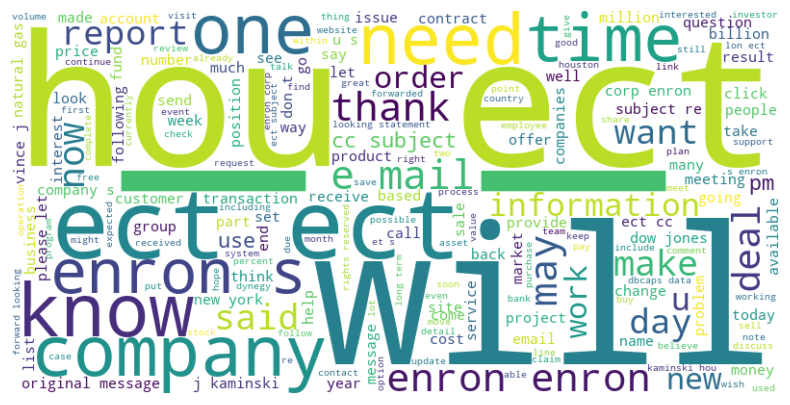

In [ ]:
from wordcloud import WordCloud


# Combine all text entries into a single string
combined_text = ' '.join(data['Subject'].fillna('') + ' ' + data['Message'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


I was surprised to discover that "hou" and "ect" are among the most frequently occurring words in the dataset. These words presumably lack any meaningful significance, so I took the initiative to investigate their context within the data.

Upon examination, I found that they are commonly used for formatting purposes when quoting previous emails in replies. This insight left me with two potential approaches:

1. I could exclude these words from the dataset since they do not convey any meaningful content.
2. Alternatively, I could retain them in the training set, as the presence of replies significantly reduces the likelihood of an email being spam.

After careful consideration, I have chosen to proceed with the second approach.

### 5.2Machine Learning Model Training

Training the model on the pre-processed data is a straightforward process.

First, I import the class of the chosen model from the <i>sklearn</i> library. In this case, I opted for the <i>Multinomial Naive Bayes</i> model.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Next, I initialize the model and assign it to a variable called <i>model</i>.

In [ ]:
model = MultinomialNB()  # Initialize the Multinomial Naive Bayes model

Then, I train the model using the <i>.fit()</i> function, providing <i>X_train</i> and <i>y_train</i> as arguments.

In [ ]:
model.fit(X_train, y_train)  # Train the model with training data

Finally, I save the model's predictions based on the <i>X_test</i> inputs into a variable named <i>y_pred</i>. 

This predicted output will later be compared to the actual labels to evaluate the model's accuracy.

In [ ]:
y_pred = model.predict(X_test)  # Predict outputs for the test data

### 5.3 Visualizing the Model's Findings

At this stage, the model has been successfully trained. While I understand how it works, I would like to visualize its findings. Specifically, I am intrested which words contribute most to classifying an email as <i>Spam</i> and which are indicative of <i>Ham</i>.

To achieve this, I use the code below to generate a visualization of the top 10 words that are most indicative of each type of email.

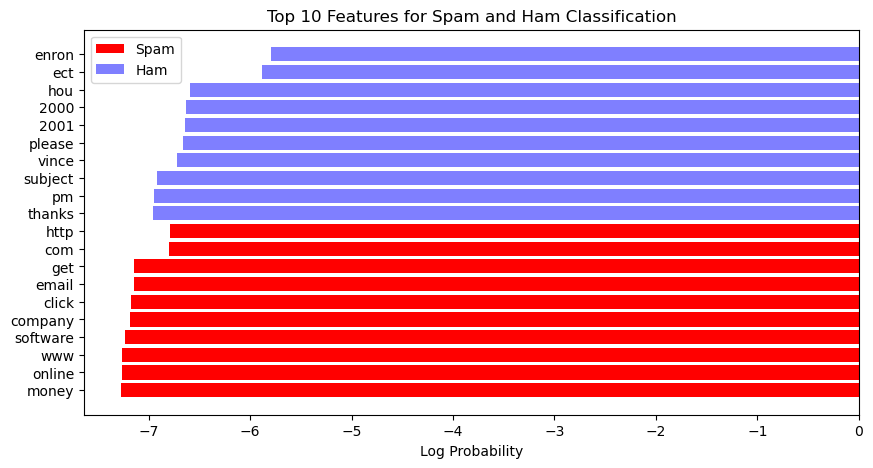

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def visualize_word_significance(model, vectorizer):
    words = vectorizer.get_feature_names_out()
    log_probs = model.feature_log_prob_
    
    spam_importance = log_probs[1]
    ham_importance = log_probs[0]
    
    top_n = 10
    spam_indices = np.argsort(spam_importance)[-top_n:]
    ham_indices = np.argsort(ham_importance)[-top_n:]

    plt.figure(figsize=(10, 5))
    plt.barh(words[spam_indices], spam_importance[spam_indices], color='red', label='Spam')
    plt.barh(words[ham_indices], ham_importance[ham_indices], color='blue', label='Ham', alpha=0.5)
    plt.xlabel('Log Probability')
    plt.title(f'Top {top_n} Features for Spam and Ham Classification')
    plt.legend()
    plt.show()

visualize_word_significance(model, vectorizer)


As illustrated in the graph above, <i>Spam</i> emails frequently reference topics related to money or companies, often include calls-to-action, and tend to contain numerous links.

In contrast, <i>Ham</i> emails exhibit a less consistent pattern. However, we observe that mentions of time ("pm") and polite expressions such as "thanks" and "please" are relatively common. Additionally, the word "ect", which we previously identified as indicative of a reply chain, also appears.

### 6. Initial Model's Evaluation

I'm excited to see the model operational and ready for testing! Fortunately, the <i>sklearn</i> library offers numerous built-in functions that simplify the process of evaluating its accuracy.

Let's start by importing the functions used for model evaluation.

The <i>accuracy_score()</i> function allows us to understand the accuracy in percentages, and the second function creates a table containing the number of emails labeled correctly and incorrectly, which is called a <i>confusion matrix</i>.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Now, using the imported functions, I will assign their outputs to variables called <i>accuracy</i> and <i>conf_matrix</i>.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

Finally, I will display them using the <i>print()</i> function.

In [ ]:
# Display counts of correct and incorrect predictions for each class
print(f"Spam labeled right/wrong: {conf_matrix[0][0]} / {conf_matrix[0][1]}")
print(f"Ham labeled right/wrong: {conf_matrix[1][1]} / {conf_matrix[1][0]}")

Accuracy: 0.988221081244337
Spam labeled right/wrong: 1638 / 16
Ham labeled right/wrong: 1634 / 23


As shown above, the model's accuracy is already impressive. It was able to label about 98.8% of emails in the test dataset correctly.

However, there is a way to make it even better, which is exactly what I will do in the next step.

### 7. Hyperparameter Tuning Using Randomized Search

In simple words, <i>hyperparameters</i> are settings or configurations defined before training a model. Unlike parameters, which the model learns from the data during training, hyperparameters are set manually and can significantly affect the model's performance.

Although the model is already trained, it currently uses default hyperparameters. There is a possibility that we can improve the model's accuracy by tweaking some of these values. One of the most common methods to find optimal hyperparameters is using <i>Randomized Search</i>. This technique randomly samples values from a specified range to identify the best ones.

This process takes some time, as the model needs to be trained and tested repeatedly before reporting the best values.

To begin, I will import the <i>RandomizedSearchCV</i> class.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Next, I will define <i>param_distributions</i>, which specifies the range of values that will be used during the optimization process.

In this case, only the <i>alpha</i> parameter will be tweaked.

In [ ]:
param_distributions = {
    'alpha': np.linspace(0.1, 2.0, 10)  # Range of alpha values for optimization
}

Now, after providing the necessary arguments, <i>RandomizedSearchCV</i> will proceed with finding the best possible hyperparameters.

In [ ]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                   n_iter=10, scoring='accuracy', cv=3, verbose=1, random_state=42)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

To gain a better understanding of the optimization process's conclusions, I will print out the best parameters.

In [ ]:
# Output the best parameters found
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'alpha': 0.1}


As shown above, the optimization process deemed the <i>alpha</i> value of 0.1 to be the best.

Finally, I will save the model using these settings in a variable called <i>best_model</i> for later use.

In [ ]:
# Get the best model from the randomized search
best_model = random_search.best_estimator_

### 8. Optimized Model's Evaluation

Now, let's evaluate the model's accuracy with the best parameters.

To do this, I will use the <i>.score()</i> function, providing the same datasets, <i>X_test</i> and <i>y_test</i>, as arguments.

In [ ]:
# Evaluate the test accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)

Let's print the outcome to see if the optimization process has indeed improved the accuracy.

In [ ]:
# Output the test accuracy with the best parameters
print("Test Accuracy with Best Parameters:", test_accuracy)

Test Accuracy with Best Parameters: 0.9912413168227122


As shown above, the Randomized Search technique helped increase the model's accuracy by 0.31%, thereby <b>reducing the error rate by 25.6%</b>.

This is a substantial improvement, bringing the model's accuracy even closer to perfection.

### 9. Manual Testing

Now, I'd like to test the model by composing an email myself and observing how it is labeled. I'll start by defining a function that accomplishes this.

In [10]:
def predict_email(subject, message):
    # Preprocess the subject and message
    cleaned_subject = preprocess_text(subject)
    cleaned_message = preprocess_text(message)
    
    # Combine cleaned subject and message
    custom_email = cleaned_subject + ' ' + cleaned_message
    
    # Vectorize the combined email text
    custom_email_vectorized = vectorizer.transform([custom_email]).toarray()
    
    # Make a prediction using the best model
    prediction = best_model.predict(custom_email_vectorized)
    
    # Return the label corresponding to the predicted class
    return le.inverse_transform(prediction)[0]

Everything is ready for testing now. Feel free to modify the inputs and explore how it works!

In [11]:
# Test the email prediction function with a sample subject and message. Try it yourself!
result = predict_email("Buy our latest product!", "We invite you to buy our company's newest product!")

print(f"The email is predicted to be: {result}.")

The email is predicted to be: spam.


In this example the e-mail was correctly labled as <i>spam</i>.

How did the model perform with your input?

### 10. Saving the Model and the Vectorizer for future use

Now that the model is functioning and I've identified the best parameters, I would like to save it. This way, I don't have to undergo resource-intensive training each time I want to utilize its labeling capabilities. 

This task can be easily accomplished using the <i>joblib</i> library and it's function <i>dump()</i>. Let's start by importing it.

In [ ]:
from joblib import dump

Now, let's save both the <i>best_model</i> and the <i>vectorizer</i> using two simple commands shown below.

In [ ]:
# Save the trained model to a file for future use
dump(best_model, 'spam_detection_best_model.joblib')

# Save the vectorizer to a file for later access
dump(vectorizer, 'vectorizer.joblib')